Question 1. On ‘doolittle-head.py’ in the BB, write your own Doolittle LU decompositor and apply it to the 5x5 matrix in the same file.


In [1]:
import numpy as np
import scipy.linalg as la

In [2]:
A=np.array([[2,4,5,-1,-3],
           [1,3,2,6,-2],
           [4,2,1,0,-3],
           [-3,0,6,1,2],
           [-1,1,2,4,2]])


In [3]:
x_len = A.shape[0]
y_len = A.shape[1]

In [4]:
n=5
u=np.zeros(n*n);  u=np.reshape(u,[n,n])
l=np.zeros(n*n);  l=np.reshape(l,[n,n])
B=np.zeros(n*n);  B=np.reshape(B,[n,n])

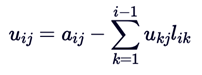
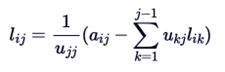

In [6]:
# Write your own doolittle decompositor here
u[0,0] = A[0,0]
for j in range(n) :
    l[j,j] = 1

#for j in range(n) :
    for i in range(j+1) :
        u_fac = sum(u[k,j]*l[i,k] for k in range(i))
        u[i,j] = A[i,j] - u_fac
    for i in range(j,n) :
        l_fac = sum(u[k,j]*l[i,k] for k in range(j))
        l[i,j] = (A[i,j]-l_fac)/u[j,j]

In [7]:
# From here, it is just to check LxU gives the original matrix
# matrix product of L and U
for i in range(n):
	for j in range(n):
		s=0; 
		for k in range(n): s += l[i,k]*u[k,j]
		B[i,j] = s


In [8]:
print(A)  # original matrix
print(l)  # lower triangular
print(u)  # upper triangular
print(B)  # Check if LU=A

[[ 2  4  5 -1 -3]
 [ 1  3  2  6 -2]
 [ 4  2  1  0 -3]
 [-3  0  6  1  2]
 [-1  1  2  4  2]]
[[ 1.          0.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.          0.        ]
 [ 2.         -6.          1.          0.          0.        ]
 [-1.5         6.         -1.375       1.          0.        ]
 [-0.5         3.         -0.5         0.26666667  1.        ]]
[[  2.           4.           5.          -1.          -3.        ]
 [  0.           1.          -0.5          6.5         -0.5       ]
 [  0.           0.         -12.          41.           0.        ]
 [  0.           0.           0.          16.875        0.5       ]
 [  0.           0.           0.           0.           1.86666667]]
[[ 2.  4.  5. -1. -3.]
 [ 1.  3.  2.  6. -2.]
 [ 4.  2.  1.  0. -3.]
 [-3.  0.  6.  1.  2.]
 [-1.  1.  2.  4.  2.]]


In [9]:
#built in function
import scipy.linalg  
P, L, U = scipy.linalg.lu(A)
print(L)
print(U)

[[ 1.          0.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.          0.        ]
 [-0.75        0.5         1.          0.          0.        ]
 [ 0.25        0.83333333 -0.44444444  1.          0.        ]
 [-0.25        0.5         0.          0.6         1.        ]]
[[ 4.          2.          1.          0.         -3.        ]
 [ 0.          3.          4.5        -1.         -1.5       ]
 [ 0.          0.          4.5         1.5         0.5       ]
 [ 0.          0.          0.          7.5         0.22222222]
 [ 0.          0.          0.          0.          1.86666667]]
